In [1]:
# Import necessary modules
import pandas as pd
from datetime import datetime as dt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

%matplotlib inline

In [2]:
# Homes contains data on home sales, zipcodes is for encoding cities later
homes = pd.read_csv('data/kc_house_data.csv')
zipcodes = pd.read_csv('data/zips.csv')

# Columns suggested to drop by project description
cols_to_drop = (['id','date','sqft_above','sqft_basement',
                'lat','long','sqft_living15','sqft_lot15'])
homes = homes.drop(cols_to_drop,axis=1)

# Exchange the zipcode column for a city column based on zipcode
homes = homes.merge(zipcodes,how='left',on='zipcode').drop('zipcode',axis=1)
#homes.info()

In [3]:
homes.loc[homes.bedrooms > 20,'bedrooms'] = 3

In [4]:
waterfront_rule = {'NO':0,'YES':1}
waterfronts = homes.waterfront.fillna('NO').map(waterfront_rule)
homes.waterfront = waterfronts

In [5]:
view_rule = {'NONE':0,'FAIR':1,'AVERAGE':2,'GOOD':3,'EXCELLENT':4}
views = homes.view.fillna('NONE').map(view_rule)
homes.view = views

In [6]:
condition_rule = {'Poor':0,'Fair':1,'Average':2,'Good':3,'Very Good':4}
conditions = homes.condition.map(condition_rule)
homes.condition = conditions

In [7]:
grades = homes.grade.apply(lambda x: int(x.split()[0]))
homes.grade = grades

In [8]:
homes.yr_renovated.fillna(0,inplace=True)
def since_reno(home):
    if home.yr_renovated < home.yr_built:
        return dt.today().year - home.yr_built
    else:
        return dt.today().year - home.yr_renovated
homes['since_reno'] = homes.apply(lambda x:since_reno(x),axis=1)
homes.drop('yr_renovated',inplace=True,axis=1)

In [9]:
homes['age'] = dt.today().year - homes['yr_built']
homes.drop('yr_built',inplace=True,axis=1)

In [10]:
cities = pd.get_dummies(homes.city,prefix='city',sparse=False,drop_first=True)
homes.drop('city',inplace=True,axis=1)

In [11]:
# Modifications to test go here
homes.drop('sqft_lot',inplace=True,axis=1)
homes.drop('since_reno',inplace=True,axis=1)
homes.price = homes.price.apply(np.log)
homes.sqft_living = homes.sqft_living.apply(np.log)
homes = pd.concat([homes,cities],axis=1)

In [12]:
X = homes.drop('price',axis=1)
y = homes.price

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X=X,y=y)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
X_scaled = sm.add_constant(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,random_state=271828)

===============================================================================================================================

In [13]:
regressor = LinearRegression().fit(X_train,y_train)
print(regressor.score(X_train,y_train))
print(regressor.score(X_test,y_test))

0.7786636472903896
0.7829954144241602


In [14]:
sm_regressor = sm.OLS(y_train,X_train).fit()
sm_regressor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     1777.
Date:                Sat, 19 Feb 2022   Prob (F-statistic):               0.00
Time:                        13:07:48   Log-Likelihood:                -411.31
No. Observations:               16197   AIC:                             888.6
Df Residuals:                   16164   BIC:                             1142.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 13.0480      0.002   6682.556      0.000      13.044      13.052
bedrooms              -0.0324      0.003    -12.111      0.000      -0.038      -0.027
bathrooms              0.0490      0.003     14.067      0.000       0.042       0.056
sqft_living            0.1794      0.004     43.799      0.000       0.171       0.187
floors                 0.0435      0.003     17.150      0.000       0.039       0.048
waterfront             0.0271      0.002     12.753      0.000       0.023       0.031
view                   0.0410      0.002     18.141      0.000       0.037       0.045
condition              0.0344      0.002     15.939      0.000       0.030       0.039
grade                  0.2001      0.003     58.986      0.000       0.193       0.207
age                    0.1064      0.003     36.188      0.000       0.101       0.112
city_Bellevue          0.1692      0.003     55.113      0.000       0.163       0.175
city_Black_Diamond     0.0185      0.002      9.103      0.000       0.014       0.022
city_Bothell           0.0387      0.002     18.464      0.000       0.035       0.043
city_Carnation         0.0255      0.002     12.292      0.000       0.021       0.030
city_Duvall            0.0306      0.002     14.421      0.000       0.026       0.035
city_Enumclaw          0.0050      0.002      2.254      0.024       0.001       0.009
city_Fall_City         0.0283      0.002     13.454      0.000       0.024       0.032
city_Federal_Way      -0.0084      0.003     -3.263      0.001      -0.014      -0.003
city_Issaquah          0.0872      0.003     33.283      0.000       0.082       0.092
city_Kenmore           0.0436      0.002     19.000      0.000       0.039       0.048
city_Kent              0.0087      0.003      3.004      0.003       0.003       0.014
city_Kirkland          0.1234      0.003     44.513      0.000       0.118       0.129
city_Maple_Valley      0.0278      0.002     11.237      0.000       0.023       0.033
city_Medina            0.0566      0.002     27.907      0.000       0.053       0.061
city_Mercer_Island     0.0882      0.002     39.461      0.000       0.084       0.093
city_North_Bend        0.0329      0.002     15.155      0.000       0.029       0.037
city_Redmond           0.1210      0.003     43.598      0.000       0.116       0.126
city_Renton            0.0601      0.003     19.313      0.000       0.054       0.066
city_Sammamish         0.0942      0.003     35.041      0.000       0.089       0.099
city_Seattle           0.2288      0.005     44.935      0.000       0.219       0.239
city_Snoqualmie        0.0481      0.002     21.145      0.000       0.044       0.053
city_Vashon            0.0249      0.002     12.159      0.000       0.021       0.029
city_Woodinville       0.0649      0.0

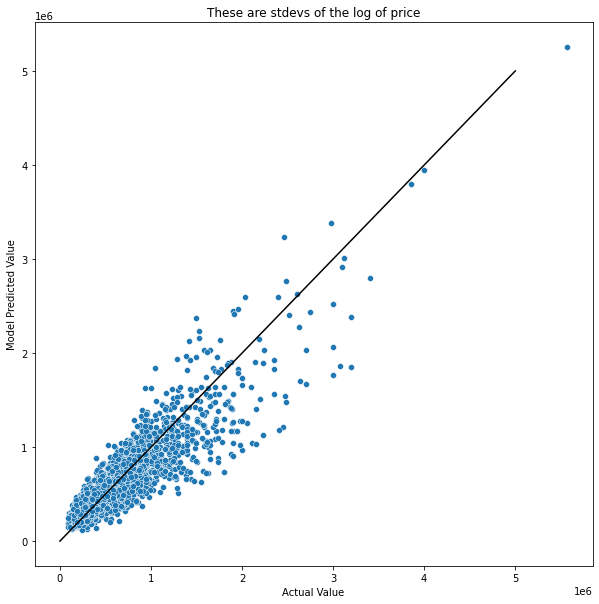

In [15]:
pred = regressor.predict(X_test)
pred_unlog = np.exp(pred)
y_unlog = np.exp(y_test)

fig,ax = plt.subplots(figsize=(10,10))
ax = sns.scatterplot(x = y_unlog,y = pred_unlog)
y_x = np.linspace(0,5e6,100)
ax.plot(y_x,y_x,color='k'); # Plots y=x
ax.set_title('These are stdevs of the log of price');
ax.set_ylabel('Model Predicted Value');
ax.set_xlabel('Actual Value');


In [26]:
def model_summary(model,train_X,test_X,train_y,test_y):
    train_r2 = model.score(train_X,train_y)
    train_mae = mean_absolute_error(y_train,model.predict(X_train))
    train_mse = mean_squared_error(y_train,model.predict(X_train))
    train_rmse = mean_squared_error(y_train,model.predict(X_train),squared=False)

    test_r2 = model.score(test_X,test_y)
    test_mae = mean_absolute_error(y_test,model.predict(X_test))
    test_mse = mean_squared_error(y_test,model.predict(X_test))
    test_rmse = mean_squared_error(y_test,model.predict(X_test),squared=False)

    labels = ['Train R2','Train Mean Abs Err','Train Mean Sq Err','Train Root Mean Sq Err',
            'Test R2','Test Mean Abs Err','Test Mean Sq Err','Test Root Mean Sq Err']
    results = [train_r2,train_mae,train_mse,train_rmse,
            test_r2,test_mae,test_mse,test_rmse]
    dfr = pd.DataFrame(results,index=labels,columns=['Values'])
    
    coefficients = pd.DataFrame(model.coef_,index=train_X.columns,columns=['Values'])

    return dfr,coefficients

model_summary(regressor,X_train, X_test, y_train, y_test)[1]


,Values
const,1.890509e-19
bedrooms,-3.240713e-02
bathrooms,4.899319e-02
sqft_living,1.794407e-01
floors,4.350039e-02
waterfront,2.706067e-02
view,4.101595e-02
condition,3.443863e-02
grade,2.001139e-01
age,1.064064e-01
